In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk


In [2]:
lifeExpectancyPrediction_Train=pd.read_csv('train.csv')
lifeExpectancyPrediction_Test=pd.read_csv('test.csv')


In [3]:
lifeExpectancyPrediction_Train

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,263,262,264,62,0.01,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271,278,264,64,0.01,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268,246,290,66,0.01,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272,248,296,69,0.01,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275,278,272,71,0.01,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207
5,6,58.9,146,2012,0,279,266,292,74,0.01,...,66,9.20,66.0,0.1,619.73,2883167,18.4,18.4,0.448,3.033150
6,7,57.5,146,2011,0,281,270,292,77,0.01,...,63,9.42,63.0,0.1,499.40,284331,18.6,18.7,0.434,2.983287
7,8,57.0,146,2010,0,287,276,298,80,0.03,...,64,8.33,64.0,0.1,418.16,2729431,18.8,18.9,0.433,2.949576
8,9,63.0,146,2009,0,295,276,314,82,0.02,...,63,6.73,63.0,0.1,414.22,26616792,19.0,19.1,0.415,2.898275
9,10,54.1,146,2008,0,295,304,286,84,0.03,...,58,7.43,58.0,0.1,305.27,2589345,19.2,19.3,0.405,2.846050


In [4]:
X_Train_Poly = lifeExpectancyPrediction_Train.drop(['TARGET_LifeExpectancy', 'ID'], axis=1)
Y_Train_Poly = lifeExpectancyPrediction_Train[['TARGET_LifeExpectancy']]
X_Test_Poly = lifeExpectancyPrediction_Test.drop('ID', axis=1)


In [5]:
from sklearn import linear_model
linReg = linear_model.LinearRegression(normalize=False)


<span style="color:blue; font-weight:bold">If i do degree=4 all the majority prediction comes to be nearly 68,which is not diverse, but given the degree 3, prediction coming from 50 to 80, which is pretty much diverse</span>

In [6]:
from sklearn.preprocessing import PolynomialFeatures
polyFeat = PolynomialFeatures(degree=4, include_bias=True)
polyTrainX = polyFeat.fit_transform(X_Train_Poly)
polyTestX = polyFeat.fit_transform(X_Test_Poly)
linReg.fit(polyTrainX, Y_Train_Poly)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
print(linReg.intercept_)
print(linReg.coef_)

[68.98220948]
[[-3.46350367e-24  1.16199032e-26 -6.06451329e-26 ... -1.91810227e-39
  -1.06092722e-38 -5.84541079e-38]]


In [8]:
predYRm_Poly = linReg.predict(polyTestX)
predictedResults=pd.DataFrame(predYRm_Poly, columns=['Predicted Life Expectancy_Polynomial']).to_csv('polynomial_prediction.csv')


## K-FOLD CROSS VALIDATION

In [9]:
from sklearn import model_selection
number_splits = 10
kFold = model_selection.KFold(n_splits=number_splits, shuffle=True)

In [10]:
lRegPara = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]

Text(0, 0.5, 'Average MSE')

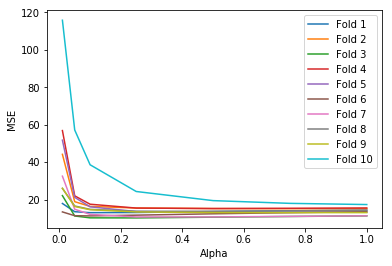

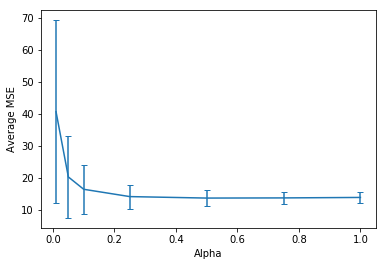

In [11]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
plt.figure()
lResults = np.zeros((number_splits,len(lRegPara)))
nsplit = 0
for trainIndex, validIndex in kFold.split(X_Train_Poly):
# Get the training and validation data
    trainX_Regularization = np.array(X_Train_Poly.loc[trainIndex])
    trainY_Regularization = np.array(Y_Train_Poly.loc[trainIndex])
    validX_Regularization = np.array(X_Train_Poly.loc[validIndex])
    validY_Regularization = np.array(Y_Train_Poly.loc[validIndex])
    
    
# This is where you're polynomial model is used!
    polyFitTrainX = polyFeat.fit_transform(trainX_Regularization)
    polyFitValidX = polyFeat.fit_transform(validX_Regularization)
    for j , regPara in enumerate(lRegPara):
        polyRidgeReg = linear_model.Ridge(alpha=regPara, normalize=True)
        polyRidgeReg.fit(polyFitTrainX, trainY_Regularization)
        predY = polyRidgeReg.predict(polyFitValidX)
        mse = mean_squared_error(validY_Regularization, predY)
        lResults[nsplit, j] = (mse)        
        
    plt.plot(lRegPara, lResults[nsplit, :], label='Fold '+str(nsplit+1))
    nsplit = nsplit + 1
    
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()
plt.figure()
plt.errorbar(lRegPara, np.mean(lResults,axis=0), yerr=np.std(lResults,axis=0),capsize=3)
plt.xlabel("Alpha")
plt.ylabel("Average MSE")

In [ ]:

plt.figure()
lResults = np.zeros((number_splits,len(lRegPara)))
nsplit = 0
for trainIndex, validIndex in kFold.split(X_Train_Poly):
# Get the training and validation data
    trainX_Regularization = np.array(X_Train_Poly.loc[trainIndex])
    trainY_Regularization = np.array(Y_Train_Poly.loc[trainIndex])
    validX_Regularization = np.array(X_Train_Poly.loc[validIndex])
    validY_Regularization = np.array(Y_Train_Poly.loc[validIndex])
    
    
# This is where you're polynomial model is used!
    polyFitTrainX = polyFeat.fit_transform(trainX_Regularization)
    polyFitValidX = polyFeat.fit_transform(validX_Regularization)
    for j , regPara in enumerate(lRegPara):
        polyRidgeReg = linear_model.Ridge(alpha=regPara, normalize=True)
        polyRidgeReg.fit(polyFitTrainX, trainY_Regularization)
        predY = polyRidgeReg.predict(polyFitValidX)
        mse = mean_squared_error(validY_Regularization, predY)
        lResults[nsplit, j] = (mse)        
        
    plt.plot(lRegPara, lResults[nsplit, :], label='Fold '+str(nsplit+1))
    nsplit = nsplit + 1
    
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()
plt.figure()
plt.errorbar(lRegPara, np.mean(lResults,axis=0), yerr=np.std(lResults,axis=0),capsize=3)
plt.xlabel("Alpha")
plt.ylabel("Average MSE")